# Цели и задачи проекта (Project aims and tasks)

Провести разведывательный анализ данных и составить отчёт по его результатам для построения модели, которая 
предсказывала бы результаты госэкзамена по математике для каждого ученика школы 

To conduct EDA and made a report for model which would predict the results of the final test on mathemetics for each student

# Первичный осмотр данных (Primary analysis of the data)

Импортирую нужные для чтения и первичного анализа библиотеки и читаю файл:

Import of necessary libraries and file reading:

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

stud_math = pd.read_csv('stud_math.csv')

Рассмотриваю какие данные хранятся в файле и какие типы данных у столбцов:

Considering of data stored in the file and types of data in the columns

In [148]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете 13 числовых и 17 строковых столбцов. Только три первых столбца не имеют нулевых значений.

Dataset has 13 digital and 17 string columns. Only first three columns do not have null values

In [149]:
stud_math.isna().sum().sum()

565

Общее количество пустых полей очень большое, поэтому к удалению данных буду относится очень аккуратно, чтобы не потерять их.

The total amount of null values is very high. So I will clean data very carefully.

# Анализ данных в столбцах (Analysis of data in columns)

Рассматриваю все столбцы по отдeльности

Consider each column separately

## school

Смотрю сколько школ содержит датасет

Check how many schools is in dataset

In [150]:
display(pd.DataFrame(stud_math.school.value_counts(dropna=False)))
stud_math.loc[:, ['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Основые школы это GP. Нулевых значений нет.

Main school in GP. No null values.

## sex

In [151]:
display(pd.DataFrame(stud_math.sex.value_counts(dropna=False)))
stud_math.loc[:, ['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Нулевых полей нет. Девочек примерно на 3% больше чем мальчиков

No null values. Girls are approximately on 3% more then boys. 

## age

In [152]:
display(pd.DataFrame(stud_math.age.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.age.nunique())  # unique values
stud_math.loc[:, ['age']].info()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


Нулевых полей нет. Основной возраст учеников от 15 до 18 лет

No null values. Basic age of students is between 15 and 18.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

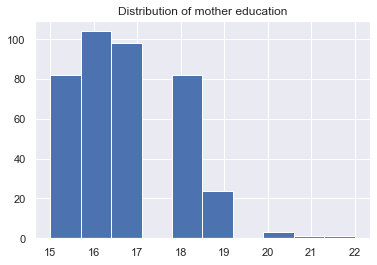

In [153]:
# посмотрим распределение возраста учеников
# check distribution of students age
stud_math.age.hist()
plt.title('Distribution of mother education')
stud_math.age.describe()

Распределение несимметричное, смещено вправо, без выбросов.

Distribution asymetrical, right shifted, no outliers.

Во всех остальных строковых полях есть пустые значения. Для упрощения очистки данных создаю функцию замены пустых строковых данных на None. Все названия строковых полей присвою переменной nominative.

All the rest of object fields have null values. To simplify data processing I make function which replace all null values by None. All columns names will be un the variable nominative.

In [154]:
nominative = [
        'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'
]

In [155]:
def nan_to_None (column): # function to replace nan to None
    stud_math.loc[:, column].fillna("None", inplace=True)

In [156]:
for col in nominative: # replacing all nominative nan fields to None
    nan_to_None(col)

## address

In [158]:
display(pd.DataFrame(stud_math.address.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.address.nunique())
stud_math.loc[:, ['address']].info()

,address
U,295
R,83
None,17


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Основное количество учеников живут в городе.

General amount of students live in the city.

## famsize

Заменяю пустые значения на None

Replace null values to None.

In [159]:
display(pd.DataFrame(stud_math.famsize.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.famsize.nunique())
stud_math.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107
None,27


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


66% учеников живут в семьях где > 3 человек

66% of students live in the families with more than 3 people.

## Pstatus

In [160]:
display(pd.DataFrame(stud_math.Pstatus.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.Pstatus.nunique())
stud_math.loc[:, ['Pstatus']].info()

,Pstatus
T,314
None,45
A,36


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


~80% учеников живут вместе с родителями

~80% of students live together with parents

## Medu

Изучаю распеределение образования матери

Study distribution of mother's education

In [161]:
display(pd.DataFrame(stud_math.Medu.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.Medu.nunique())
stud_math.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Обнаружил 3 пустых значения. Заменяю их на 0 так как это менее 1% от общего числа и не должно влиять существенно на анализ. 

Found 3 null values. Replace them to 0 because this is less than 1% of common numbers and shoudn't influence to the result of analysis.

In [162]:
# Создаю функцию для замены пустых значений на 0
# Create a function for replacement of null values to 0
nan_to_0 = lambda x: 0 if pd.isnull(x) else 0 if x == '' else x

In [163]:
stud_math.Medu = stud_math.Medu.apply(nan_to_0 )

count    395.000000
mean       2.729114
std        1.119752
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

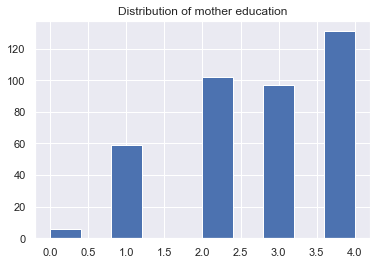

In [164]:
# посмотрим распределение образования матери
# check distribution of mother's education
stud_math.Medu.hist()
plt.title('Distribution of mother education')
stud_math.Medu.describe()

In [165]:
stud_math.Medu.unique()

array([4., 1., 3., 2., 0.])

Распределение несимметричное, смещено влево. 
Большинство матерей имеют образование от 5 классов и выше.

Distribution asymmetrical, left shifted. Most of mothers have education from 5 year and higher.

## Fedu

Изучаю распеределение образования отца

Study distribution of father's education

In [166]:
display(pd.DataFrame(stud_math.Fedu.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.Fedu.nunique())
stud_math.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Обнаружено 24 пустых значения. Также в данных есть выброс. 
Скорее всего ошибка при вводе данных, так как максимальное значение может принимать
значение 4 по условию. Заполним все пустые значения 0 чтобы не потерять данные и заменим 40 на 4. 

Found 24 null values. Also there is an outlier. Most likely there was a mistake during the input of data, cause maximum can be 4. Fill all null values by 0 in order not to lose data and replace 40 by 4. 

In [167]:
stud_math.Fedu = stud_math.Fedu.apply(lambda x: 0 if pd.isnull(x) else 0
                                      if x == '' else x)

In [168]:
stud_math.Fedu = stud_math.Fedu.replace(to_replace=40, value=4)

In [169]:
stud_math.Fedu.unique()

array([4., 1., 2., 3., 0.])

count    395.000000
mean       2.364557
std        1.214865
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

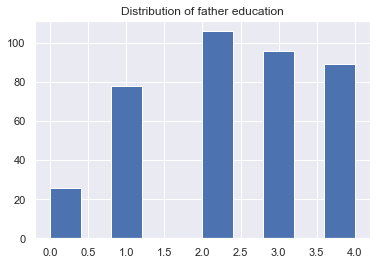

In [170]:
# проверяю распределение образования отцов
# check distribution of father' education
stud_math.Fedu.hist()
plt.title('Distribution of father education')
stud_math.Fedu.describe()

Распределение несимметричное, смещено влево. 
Большинство отцов имеют образование выше 4 классов но ниже высшего.

Distribution is asymmetrical, left shifted. Most of the fathers have education higher than 4 year but less than higher education.

## Mjob

In [171]:
display(pd.DataFrame(stud_math.Mjob.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.Mjob.nunique())
stud_math.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
None,19


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


85% матерей работают

85% of mothers works

## Fjob

In [172]:
display(pd.DataFrame(stud_math.Fjob.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.Fjob.nunique())
stud_math.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
None,36
teacher,29
at_home,16
health,15


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


87% отцов работают

87% of fathers works

## reason

In [173]:
display(pd.DataFrame(stud_math.reason.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.reason.nunique())
stud_math.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34
None,17


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Основыми причинами выбора школы были образовательная программа, репутация школы и ее близость к дому.

Main reasons of school chosen were educational programme, school reputation and distance to home.

## guardian

In [174]:
display(pd.DataFrame(stud_math.guardian.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.guardian.nunique())
stud_math.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
None,31
other,28


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


64% опекунами являются матери

64% of guardians are mothers

## traveltime

In [175]:
display(pd.DataFrame(stud_math.traveltime.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.traveltime.nunique())
stud_math.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Важный показатель вермени пути до школы. Он должен коррелировать с причиной выбора школы. Пустые значения заменим на 0 чтобы не терять данные.

Important index is time to home. It has to correlate with the reason of school chosen. Null values repace by 0.

In [176]:
stud_math.traveltime = stud_math.traveltime.apply(nan_to_0)

In [177]:
display(pd.DataFrame(stud_math.traveltime.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.traveltime.nunique())
stud_math.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
0.0,28
3.0,22
4.0,7


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    395.000000
mean       1.336709
std        0.764401
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

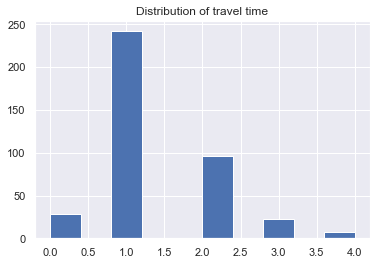

In [178]:
# проверяю распределение времени в пути до школы
# check deistribution of time to travel to school
stud_math.traveltime.hist()
plt.title('Distribution of travel time')
stud_math.traveltime.describe()

Распределение несимметричное, смещено вправо. Большенство учеников живут в пределах 30 минут от школы.

Distribution is assymetrical, right shifted. Most part of students live within 30 minutes form school.

## studytime

In [179]:
display(pd.DataFrame(stud_math.studytime.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.studytime.nunique())
stud_math.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заменим все пустые значения на 0 как в предыдущем случае.

Replace all null values by 0 as previously.

In [180]:
stud_math.studytime = stud_math.studytime.apply(nan_to_0)

count    395.000000
mean       2.002532
std        0.876943
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

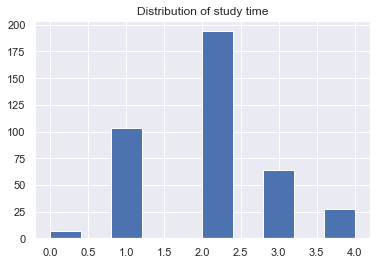

In [181]:
# проверяю распределение времени на обучение
# check distribution of study time
stud_math.studytime.hist()
plt.title('Distribution of study time')
stud_math.studytime.describe()

Время, затраченное на учебу помимо школы, распределено симметрично, и распределение стремится к нормальному. 
В основном ученики затрачивают от 1 до 2 часов в неделю на дополнительную учебу.

Time spent to study excluding school, is distributed symmetrically and strive for normal. Mostly students spent form 1 to 2 hours per week for additional education.

## failures

In [182]:
display(pd.DataFrame(stud_math.failures.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.failures.nunique())
stud_math.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


По заданному условию количество внеучебных неудач может принимать значение от 1 до 3 и во всех остальных случаях 0. Поэтому пустые значения можно заполнить 0.

According to the task the amount of failures can be between 1 and 3 and in all other cases - 0. That's why null values can be replaced by 0.

In [183]:
stud_math.failures = stud_math.failures.apply(nan_to_0)

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

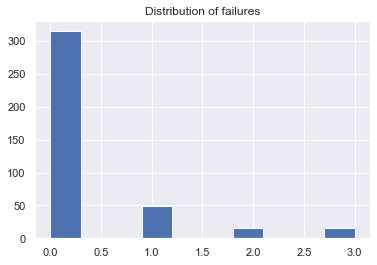

In [184]:
# проверяю распределение количества внеучебных неудач
# check distribution of failures
stud_math.failures.hist()
plt.title('Distribution of failures')
stud_math.failures.describe()

Распределение несимметричное, смещено вправо. Наибольшее распределение внеучебных неудач находится в 0, т.е. внеучебные неудачи отсутствуют.

Distribution is assymetrical, rigth shifted. Most failures are in 0, i.e. no failures.

## schoolsup 

In [185]:
display(pd.DataFrame(stud_math.schoolsup.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.schoolsup.nunique())
stud_math.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51
None,9


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Большинство учеников (85%) не получает дополнительную образовательную поддержку

Most students (85%) do not get additional education support.

## famsup

In [186]:
display(pd.DataFrame(stud_math.famsup.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.famsup.nunique())
stud_math.loc[:, ['famsup']].info()

,famsup
yes,219
no,137
None,39


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Примерно 55% получают семейную образовательную поддержку

Around 55% get family educational support.

## paid

In [187]:
display(pd.DataFrame(stud_math.paid.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.paid.nunique())
stud_math.loc[:, ['paid']].info()

,paid
no,200
yes,155
None,40


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Примерно половина учеников не получает дополнительные платные занятия по математике

Approximately half of students do not get additional paid lessons on math.

## activities 

In [188]:
display(pd.DataFrame(stud_math.activities.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.activities.nunique())
stud_math.loc[:, ['activities']].info()

,activities
yes,195
no,186
None,14


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Примерно половина учеников получает дополнительные внеучебные занятия

Approximately half of students get additional activities.

## nursery 

In [189]:
display(pd.DataFrame(stud_math.nursery.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.nursery.nunique())
stud_math.loc[:, ['nursery']].info()

,nursery
yes,300
no,79
None,16


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


75% учеников посещали детские сады

75% of students were in the nursery.

##  studytime, granular 


In [190]:
display(
    pd.DataFrame(stud_math['studytime, granular'].value_counts(dropna=False)))
print("Уникальных значений:", stud_math['studytime, granular'].nunique())
stud_math.loc[:, ['studytime, granular']].info()

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Столбец по статистическим данным соответствует столбцу studytime. Соответственно его можно исключить из анализа.

Column is equal to column studytime by statistical data. Consiquantely it can be excluded from the analysis.

In [191]:
stud_math.drop(['studytime, granular'], inplace=True, axis=1)

## higher

In [192]:
display(pd.DataFrame(stud_math.higher.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.higher.nunique())
stud_math.loc[:, ['higher']].info()

,higher
yes,356
None,20
no,19


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


90% учеников желают получить высшее образование

90% of students would like to get higher education.

## internet

In [193]:
display(pd.DataFrame(stud_math.internet.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.internet.nunique())
stud_math.loc[:, ['internet']].info()

,internet
yes,305
no,56
None,34


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


76% учеников имеют доступ к интернету

76% of students has internet.

## romantic

In [194]:
display(pd.DataFrame(stud_math.romantic.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.romantic.nunique())
stud_math.loc[:, ['romantic']].info()

,romantic
no,240
yes,124
None,31


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


61% учеников не имеют романтических отношений

61% of students does not have romantic relationships.

## famrel

Посмотрим распределение семейных отношений

Lets look at distribution of family relaitions.

In [195]:
display(pd.DataFrame(stud_math.famrel.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.famrel.nunique())
stud_math.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

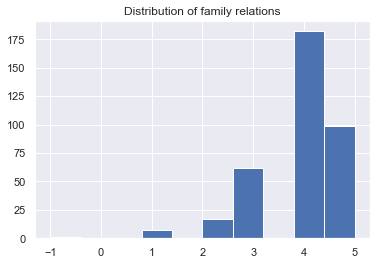

In [196]:
# проверяю распределение отношений в семье
# check distibution of family relations
stud_math.famrel.hist()
plt.title('Distribution of family relations')
stud_math.famrel.describe()

Есть выбросы. Распределение несимметричное, смещено влево. Основные данные по семейным отношения находятся в интервале от 4 до 5, что означает хорошие и очень хорошие отношения в семье.
Для отфильтрования выбросов вопользуюсь формулой интерквартильного расстояния.

There are outliers. Distribution is asymmetrical, left shifted. Main data on family relations is between 4 and 5, which means that relations in the families are good and very good. To filter outliers I use formular of interquartile rang.

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


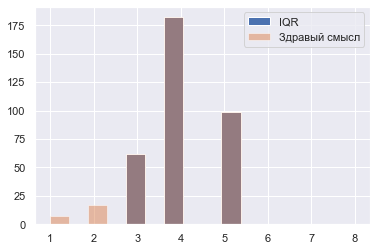

In [197]:
perc25 = stud_math.famrel.quantile(0.25)  # 25 quartile
perc75 = stud_math.famrel.quantile(0.75)  # 75 quartile
IQR = perc75 - perc25
print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR,
                                           l=perc75 + 1.5 * IQR))

stud_math.famrel.loc[stud_math.famrel.between(perc25 - 1.5 * IQR, perc75 +
                                              1.5 * IQR)].hist(bins=16,
                                                               range=(1, 8),
                                                               label='IQR')
stud_math.famrel.loc[stud_math.famrel >= 1].hist(alpha=0.5,
                                                 bins=16,
                                                 range=(1, 8),
                                                 label='Здравый смысл')
plt.legend()

По определению возможные значения должны варироваться от 1 до 5. Скорее всего при сборе данных произошла ошибка. Поэтому воспользуемся здравым смыслом, чтобы не потерять нужные данные и заменим все значения меньше 1, а также пустые значения на 0.

According to the task possible values varies between 1 and 5. Most likely there was a mistake during data collection. That's why I use common sense in order not to loss data and replace by 0 all values less than 1 and null values.

In [198]:
stud_math.famrel = stud_math.famrel.apply(
    lambda x: 0 if x < 1 else 0 if pd.isnull(x) else 0 if x == '' else x)

In [199]:
display(pd.DataFrame(stud_math.famrel.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.famrel.nunique())
stud_math.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
0.0,28
2.0,17
1.0,7


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


## freetime

In [200]:
display(pd.DataFrame(stud_math.freetime.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.freetime.nunique())
stud_math.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [201]:
# заменю пустые поля на 0 чтобы не терять другие данные
# replace null values by 0 in order not to loos data
stud_math.freetime = stud_math.freetime.apply(nan_to_0)

count    395.000000
mean       3.141772
std        1.115262
min        0.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

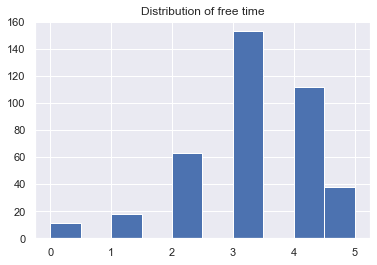

In [202]:
# проверяю распределение свободного времени
# check distribution of free time
stud_math.freetime.hist()
plt.title('Distribution of free time')
stud_math.freetime.describe()

Распределение несимметричное, смещено влево, выбросов нет. В основном свободного времени достаточно.

Distribution is asymmetrical, left shifted, no outliers. Mostly it is enough of free time.

## goout

In [203]:
display(pd.DataFrame(stud_math.goout.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.goout.nunique())
stud_math.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [204]:
# заменю пустые поля на 0 чтобы не терять другие данные
# replace null values by 0 in order not to loss data
stud_math.goout = stud_math.goout.apply(nan_to_0)

count    395.000000
mean       3.043038
std        1.188212
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

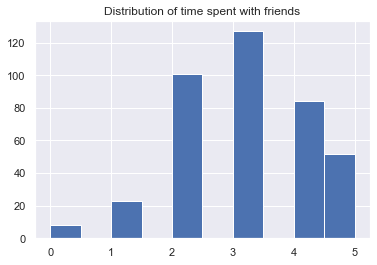

In [205]:
# проверяю распределение прoведения времени с друзьями
# check distribution of time spent with friends
stud_math.goout.hist()
plt.title('Distribution of time spent with friends')
stud_math.goout.describe()

Выбросов нет. Распределение симметричное, стремится к нормальному. Ученики тратят среднее количество времени на друзей.

No outliers. Distribution is symmetrical, strive for normal. Students spent mean amount of time for friends.

## health

In [206]:
display(pd.DataFrame(stud_math.health.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.health.nunique())
stud_math.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Заменю пустые поля на 0. Здоровье варируется от 1 - очень плохое до 5 - очень хорошее. ЗАмена пустых значений на 0 будет означать что данных нет. При этом другие данные в датасете не потеряются при удалении пустых полей.

In [207]:
# заменяю пустые поля 0 чтобы не потерять данные
# replace null values by 0 in order not to loss data
stud_math.health = stud_math.health.apply(nan_to_0)

count    395.000000
mean       3.397468
std        1.526914
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

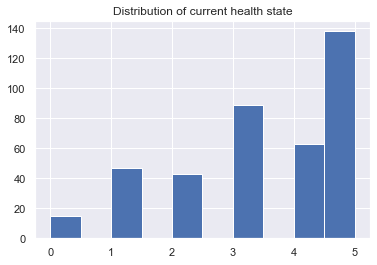

In [208]:
# проверяю распределение текущего состояния здоровья
# check distribution of current health 
stud_math.health.hist()
plt.title('Distribution of current health state')
stud_math.health.describe()

Распределение не симетричное, смещено влево, без выбросов. Основной показатель здоровья очень высокий. Большая часть учеников имеет хорошее здоровье.

Distribution is asymmetrical, left shifted, no outliers. Main index of health is very high. Most part of students have good health.

## absences

In [209]:
display(pd.DataFrame(stud_math.absences.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.absences.nunique())
stud_math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


В даной ситуации исключаю пустые поля чтобы не испортить имеющуюся статистику. Неизвестные данные не означают отсутствие пропущенных занятий.

In this instance I exclude null values in order not to spoil current statistics. Unknown data doesn't mean no absences. 

In [210]:
# удаляю все пустые значения
#drop all null values to have good statistics
stud_math.drop(stud_math[stud_math.absences.isna()].index, inplace=True)

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

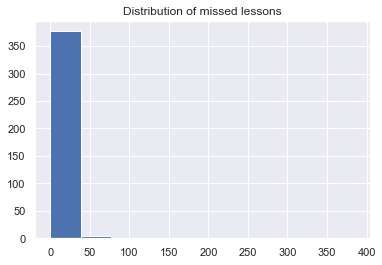

In [211]:
# проверяю распределение количества пропущенных занятий
# check distribution of missed lessons
stud_math.absences.hist()
plt.title('Distribution of missed lessons')
stud_math.absences.describe()

Распределение несимметричное, смещено вправо. Есть выбросы и их довольно много. Большинство пропусков распеределено между 0 и 8. 
Фильтруем данные с помощью формулы интерквартильного расстояния.

Distribution is asymmetrical, right shifted. There are outliers. Most missed lessons are between 0 and 8. Filter data using the formular of interquartile range.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


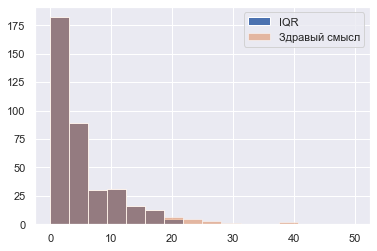

In [212]:
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
IQR = perc75 - perc25
print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR,
                                           l=perc75 + 1.5 * IQR))

stud_math.absences.loc[stud_math.absences.between(
    perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)].hist(bins=16,
                                                  range=(0, 50),
                                                  label='IQR')

stud_math.absences.loc[stud_math.absences <= 100].hist(alpha=0.5,
                                                       bins=16,
                                                       range=(0, 50),
                                                       label='Здравый смысл')

plt.legend()

Судя по уникальным значениям в таблице существует ряд данных являющихся выбросами, но имеющими здравый смысл. Под здравым смыслом принимаю значения не выше 60 пропусков. Фильтрую данные и удаляю все значения выше 60.

UNique data shows that there are some data which are outliers but they have a common sence. Under common sence I consider numbers not higher then 60. Filter the data:

In [213]:
stud_math = stud_math.loc[stud_math.absences <= 60]

## score

In [214]:
display(pd.DataFrame(stud_math.score.value_counts(dropna=False)))
print("Уникальных значений:", stud_math.score.nunique())
stud_math.loc[:, ['score']].info()

,score
50.0,53
55.0,46
0.0,36
65.0,31
75.0,31
40.0,29
60.0,29
70.0,27
45.0,25
80.0,16


Уникальных значений: 18
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   375 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


count    375.000000
mean      51.986667
std       22.824893
min        0.000000
25%       40.000000
50%       55.000000
75%       67.500000
max      100.000000
Name: score, dtype: float64

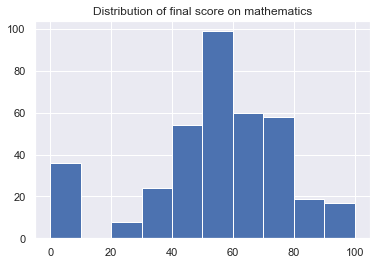

In [215]:
# проверяю распределение баллов по госэкзамену по математике
# check distribution of scores for the final test on math
stud_math.score.hist()
plt.title('Distribution of final score on mathematics')
stud_math.score.describe()

Распределение несимметричное, без выбросов. Оценки равные 0 должны тоже учитываться, так как это показатель знаний по математике. В основном ученики получают от 40 до 70 баллов.
Необходимо отфильтровать пустыe значения.

Distirbution is asymmetrical, no outliers. Scores equal to 0 have to be considered, because this is an index of knowledge on mathimatics. Mainly students get between 40 and 70 points. It is necessary to filternull values.

In [216]:
# удаляю пустые значения для чистоты данных
# delete null values for clear data
stud_math.drop(stud_math[stud_math.score.isna()].index, inplace=True)

# Корреляционный анализ данных (Correlative analysis)

Выясняю какие столбцы коррелируют с итоговой оценкой по математике.
Для этого сначала создаю матрицу корреляции corr_matrix.

Study what columns correlate to the final test scores on mathematics. For this initially create correlation matrix - corr_matrix.

In [218]:
corr_matrix = stud_math.corr()
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.141831,-0.110505,0.078531,-0.003149,0.185365,0.026931,-0.014921,0.108351,-0.074720,0.164926,-0.148726
Medu,-0.141831,1.000000,0.489663,-0.121995,0.076813,-0.222097,-0.003741,0.006785,0.083381,0.002603,0.103516,0.221823
Fedu,-0.110505,0.489663,1.000000,-0.031258,-0.009447,-0.223442,0.026739,-0.008605,0.029342,0.037769,0.032794,0.093548
traveltime,0.078531,-0.121995,-0.031258,1.000000,-0.077416,0.027976,0.009472,-0.006771,0.097080,-0.068374,0.001929,-0.034132
studytime,-0.003149,0.076813,-0.009447,-0.077416,1.000000,-0.166456,0.019682,-0.099258,-0.057413,-0.077117,-0.071095,0.087972
failures,0.185365,-0.222097,-0.223442,0.027976,-0.166456,1.000000,-0.017903,0.081824,0.088478,0.077384,0.082112,-0.319744
famrel,0.026931,-0.003741,0.026739,0.009472,0.019682,-0.017903,1.000000,0.094698,0.032296,-0.047339,-0.016743,0.042598
freetime,-0.014921,0.006785,-0.008605,-0.006771,-0.099258,0.081824,0.094698,1.000000,0.289703,0.015625,-0.104415,-0.006664
goout,0.108351,0.083381,0.029342,0.097080,-0.057413,0.088478,0.032296,0.289703,1.000000,0.001920,0.090901,-0.108632
health,-0.074720,0.002603,0.037769,-0.068374,-0.077117,0.077384,-0.047339,0.015625,0.001920,1.000000,-0.022655,-0.018830


Теперь воспользуюсь функцией heatmap из модуля seaborn для визуализации данных

Now use function heatmap from seaborn for data visualization.

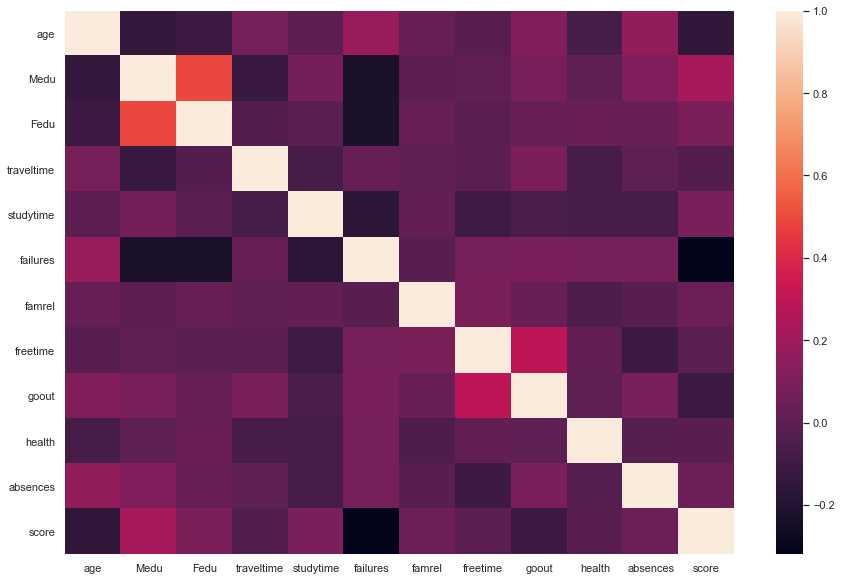

In [219]:
sns.set()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, ax=ax)

Практически все данные слабо коррелируются с финальной оценкой по математике, кроме количества внеучебных неудач (failures), которое коррелируется умеренно.
Положительная корреляции образования родителей (Medu и Fedu) с оценкой на госэкзамене говорит о том, что чем выше образование родителей, тем выше оценка по математике у ученика.
Очень мало коррелируется с финальной оценкой по математике количество свободного времени (freetime).
Отрицательная корреляция возраста (age) и количества внеучебных неудач говорят о том, что чем эти параметры ниже, тем лучше оценка за госэкзамен.
Наибольшую корреляцию с результатами госэкзамена имеют количество внеучебных неудач и образование матери ученика, которое в свою очередь хорошо коррелирует с образованием отца. 
Образование матери и отца умеренно скоррелированы между собой поэтому из двух столбцов можно бы было оставить для модели только образование матери.
Таким образом для модели оставим все поля за исключением Fedu.

Almost all data weakly correlate to the final test scores, except column failures, which moderately correlates.
Positive correlations of parents education (Medu and Fedu) with scores indicates that the higher parents education the higher scores on mathematics.
Very weak correlation between scores and free time.
Negative correlation between age and failures indicates that the lower these parameters the better scores.
The highest coreelation with scores has failures and mother's education shich in its turn well correlated with father's education.
Mother's and father's education moderately correlated to each other. It might be possible to use only mother's education for the model.
Thus for the model I leave all columns except Fedu.

# Анализ номинативных переменных (Nominative data analysis)

Рассмотрим различаются ли распределения оценки за госэкзамен в зависимости от значения следующих номинативных переменных:
school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, geardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.
Уникальных значений в столбцах не много, поэтому возьмем максимум 7.

Study if there is difference in the distribution of scores depending on following nominative variables: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, geardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
There are not many unique values in columns so lets take maximum as 7.

In [220]:
# функция построения boxplot для отдельной колонки по х и значения госэкзамена 'score' по y
# boxlplot building function for separate column on x and score on y
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column,
                y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:7])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

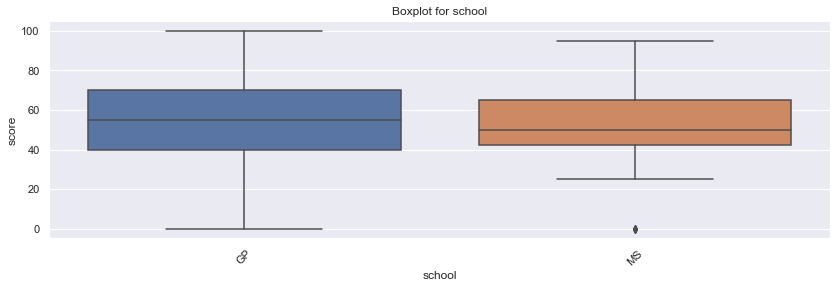

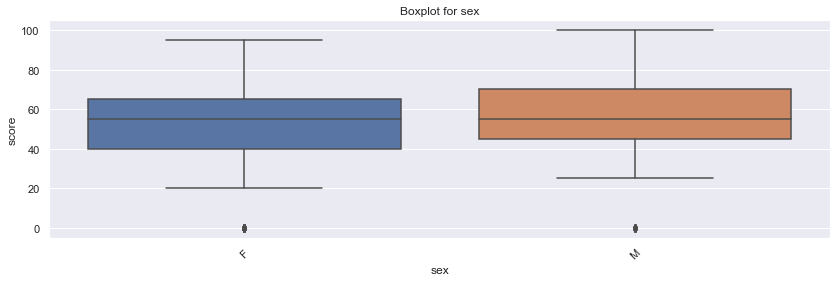

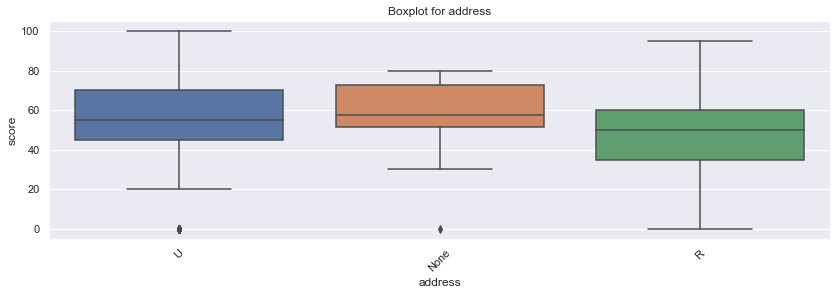

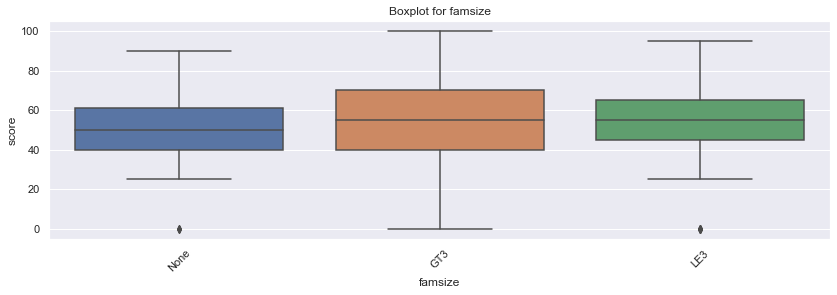

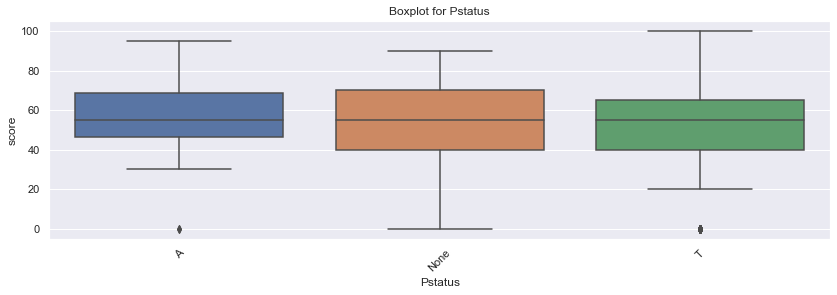

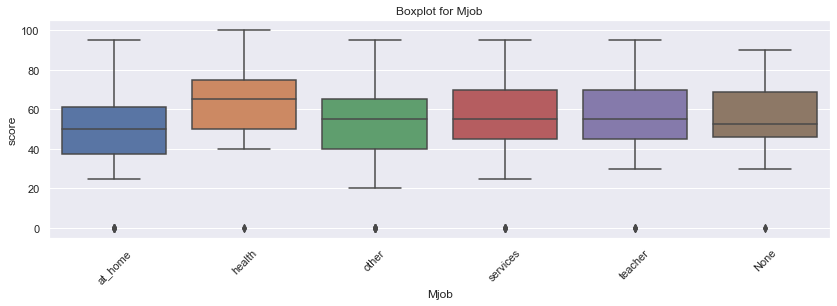

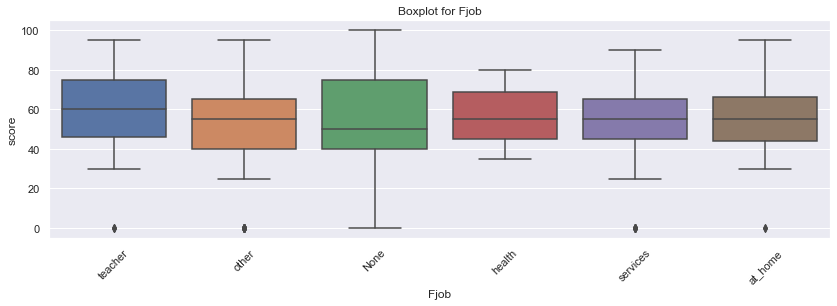

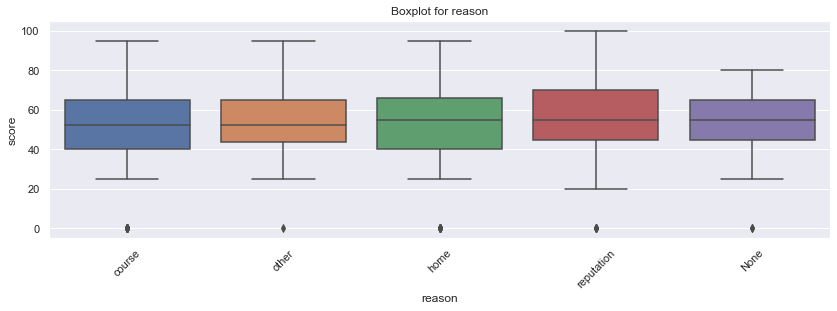

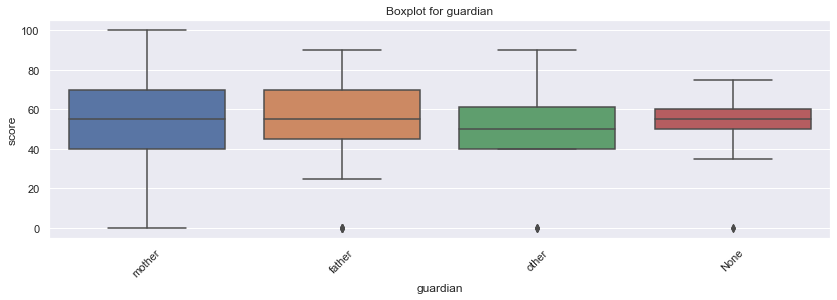

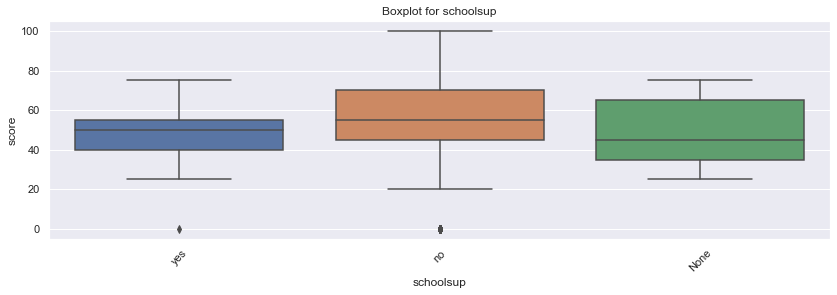

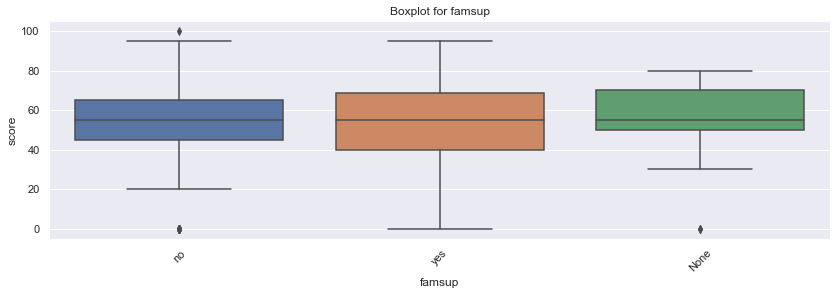

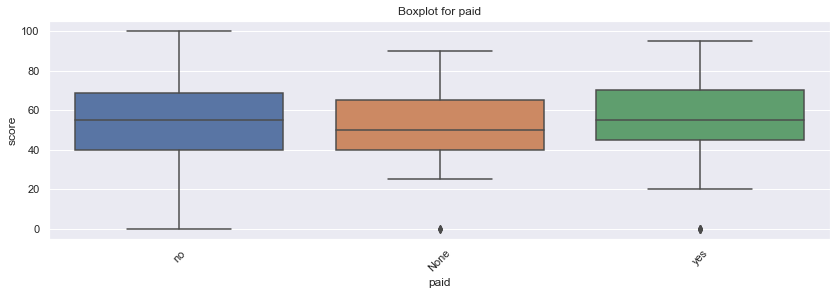

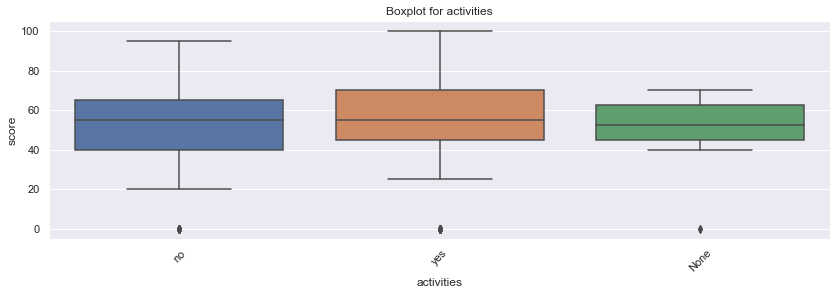

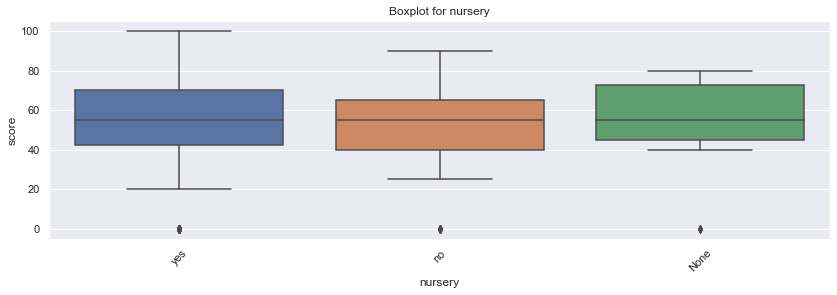

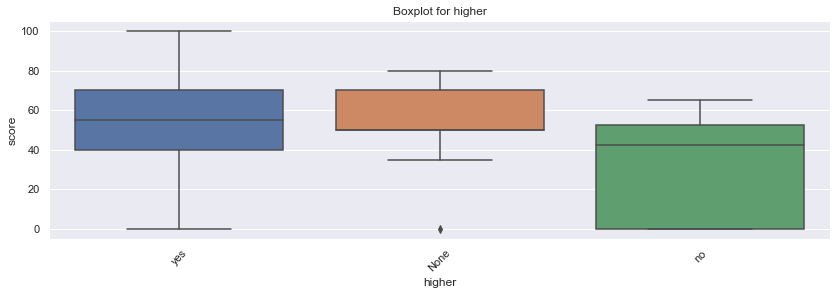

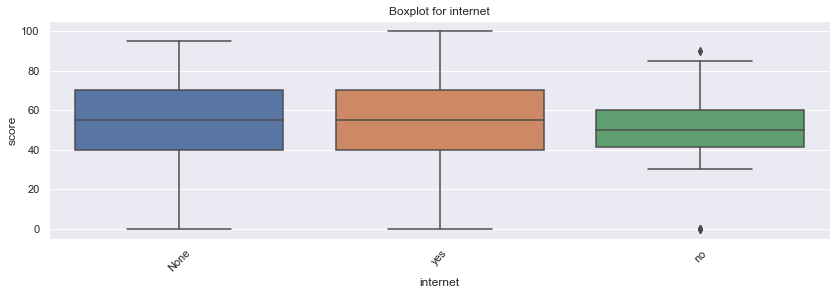

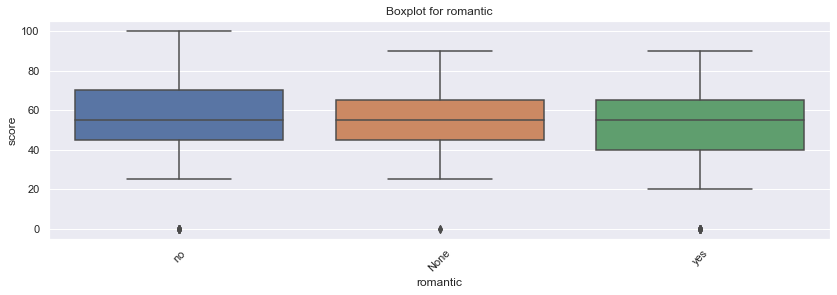

In [221]:
for col in nominative:
    get_boxplot(col)

По графиками видно что все параметры могут влияют на оценку по математике.
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок за госэкзамен по различным параметрам неразличимы.

As per boxplots, all parameters may influence to the final score. Lets check if there is statistical difference in the distribution of scores by nominative signs, using Student's test. Lets check zero hypothesis that scores distributions are the same for different parameters. 

In [222]:
#функция вычисления статистически значимых различий для колонки
# function to calculate statistically valuable differencies for the column
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки',
                  column)
            # statistically valuable differencies for the column are found
            break

In [223]:
for col in nominative:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher


Серьезно отличаются только три параметра: sex, address, higher. Основываясь на данных боксплота и проверки нулевой гипотизы оставляю следующей параметра для построения модели: sex, address, higher, school, Mjob, Fjob, Pstatus, reason, schoolsup, activities, internet, romantic.
Таким образом, важные переменные, которые, возможно влияют на оценку по математике это: age, Medu, traveltime, studytime, failures, famrel, goout, health, absences, sex, address, higher, school, Mjob, Fjob, Pstatus, reason, schoolsup, activities, internet, romantic.

Extrimely different only three parameters: sex, address, higher. Base on the boxplots data and zero hypothesis analysis I retain the follwing parameters for the model: sex, address, higher, school, Mjob, Fjob, Pstatus, reason, schoolsup, activities, internet, romantic.
Thus important variables which possibly influence to the score are: age, Medu, traveltime, studytime, failures, famrel, goout, health, absences, sex, address, higher, school, Mjob, Fjob, Pstatus, reason, schoolsup, activities, internet, romantic.

In [224]:
# подготовка данных для модели
stud_math_for_model = stud_math.loc[:, [
    'age', 'Medu', 'traveltime', 'studytime', 'failures', 'famrel', 'goout',
    'health', 'absences', 'sex', 'address', 'higher', 'school', 'Mjob', 'Fjob',
    'Pstatus', 'reason', 'schoolsup', 'activities', 'internet', 'romantic'
]]
stud_math_for_model.head()

,age,Medu,traveltime,studytime,failures,famrel,goout,health,absences,sex,address,higher,school,Mjob,Fjob,Pstatus,reason,schoolsup,activities,internet,romantic
0,18,4.0,2.0,2.0,0.0,4.0,4.0,3.0,6.0,F,U,yes,GP,at_home,teacher,A,course,yes,no,None,no
1,17,1.0,1.0,2.0,0.0,5.0,3.0,3.0,4.0,F,U,yes,GP,at_home,other,None,course,no,no,yes,no
2,15,1.0,1.0,2.0,3.0,4.0,2.0,3.0,10.0,F,U,yes,GP,at_home,other,T,other,yes,no,yes,None
3,15,4.0,1.0,3.0,0.0,3.0,2.0,5.0,2.0,F,U,yes,GP,health,None,T,home,no,yes,yes,yes
4,16,3.0,1.0,2.0,0.0,4.0,2.0,5.0,4.0,F,U,yes,GP,other,other,T,home,no,no,no,no


# Выводы (Conclusions)

1. В данных было много пустых значений. Только три первых столбца: school, sex, age, были заполнены полностью.
2. Выбросы найдены только в столбцах образование отца (Fedu), отношения в семье (famrel) и количество пропущенных занятий (absences), что позволяет сделать вывод о том, что данные достаточно чистые. 
3. Положительная корреляция образования родителей и оценки за госэкзамен может говорить о том, что чем выше образованнее родителей, тем выше итоговая оценка. Отрицательная корреляция возраста ученика и количества его внеучебных неудач c оценкой по математике может говорить о том, что чем ученик младше и имеет меньше внеучебных неудач, тем лучше будет итоговая оценка.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: aage, Medu, traveltime, studytime, failures, famrel, goout, health, absences, sex, address, higher, school, Mjob, Fjob, Pstatus, reason, schoolsup, activities, internet, romantic.

1. There are a lot of null values in the data. Only first three columns: school, sex, age, were fully filled in.
2. Outliers were found only in columns Fedu, famrel and absences, which allows to make a conclusion that the data rather clear.
3. Positive correlation between parents education and scores may indicates that the higher parent's education, the higher scores. Negative correlation between age, failures and scores may indicates that the younger student and the less failures he has, the higher scores he get.
4. The most important parameters, which are suggested to be used in future model are: age, Medu, traveltime, studytime, failures, famrel, goout, health, absences, sex, address, higher, school, Mjob, Fjob, Pstatus, reason, schoolsup, activities, internet, romantic.

## комментарий по моей работе

1. После начального анализа, на этапе номинативного анализа, была ситуация, когда были найдены статистически значимые
различия только для одной колонки - пол. Начал изучать проблему и нашел ответ в одном из чатов в слаке по данному модулю, где
ментор сказала, что возможна такая проблема из-за того, что много данных было утерено во время обработки пустых полей.
Я проверил и нашел, что порядка 100 строк не хватало после моей обработки данных.
Поэтому все начал сначала и решил что где будет логично буду заменять пустые значения на 0 в числовых столбцах.
В ходе работы вызывали сомнения правильности замены пустых значений на 0. Применял это выборочно к столбцам, основываясь на логике.
Например, столбец семейные отношения famrel должен содержать значения от 1 - очень плохие, до 5 - очень хорошие. 
Поэтому я подумал, что если пустые значения заменить на 0, то смысловой нагрузки столбец не потеряет и в то же время 
не потеряются другие данные в отличие от ситуации, когда я буду исключать пустые поля.

2. Также возникла проблема с расчетом статистически значимых различий для колонок. Много раз проводил очистку данных с самого начала, но в итоге максимум чего достиг это три колонки. Изучал решение этой же проблемы в слаке, но так и не смог получить те самые 8 колонок. В итоге делал выводы по совокупности двух показателей: боксплота и расчета т статистики.
Буду признателен, если подскажите как правильно действовать в подобных ситуациях. 
Спасибо!